# different by splitting to train test valid (here valid and test are switched)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from dataset_loader import *
from utils import *
from datasets import Dataset, DatasetDict
from joblib import dump, load
import datasets
import logging
import warnings
from retrain_utils import *
logging.disable(logging.WARNING) 
datasets.set_progress_bar_enabled(False)
warnings.simplefilter("ignore")

SEED = 84
torch.manual_seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
dataset_name = 'sentiment'
ds = get_ds(dataset_name)

In [3]:
model_name = 'huawei-noah/TinyBERT_General_4L_312D'
tokenizer = AutoTokenizer.from_pretrained(model_name)
folder_name = 'svm'

In [4]:
retrain_utils = RetrainUtils(model_name, dataset_name, folder_name)
added_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.ADD)
removed_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REMOVE)
replaced_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REPLACE)

In [5]:
ds['train'] = removed_train

In [6]:
model = MySVM()
model.train(ds, tokenizer)

Train accuracy 0.9529494382022472
Validation accuracy 0.6756134969325154


In [7]:
save_folder = f'svm/{dataset_name}/retrained_model'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
dump(model, f'{save_folder}/traced.pt') 

['svm/sentiment/retrained_model/traced.pt']

In [8]:
retrained_model = load_model(f'{folder_name}/{dataset_name}/retrained_model/traced.pt').to(device).eval()
orig_model = load_model(f'{folder_name}/{dataset_name}/traced.pt').to(device).eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

## Corona

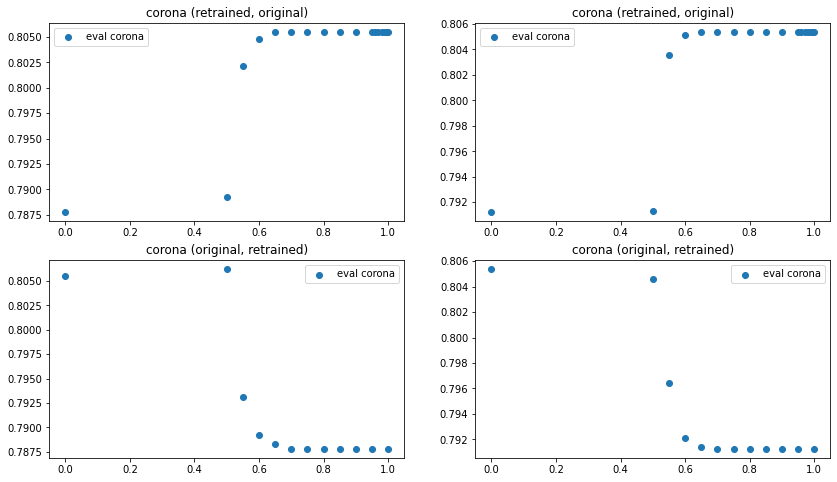

In [9]:
ds = get_ds('corona')
ensemble_results(folder_name, model_name, 'corona', 'corona', ds['val'], ds['test'], 'retrained_model/traced.pt', 'traced.pt')

## Sentiment

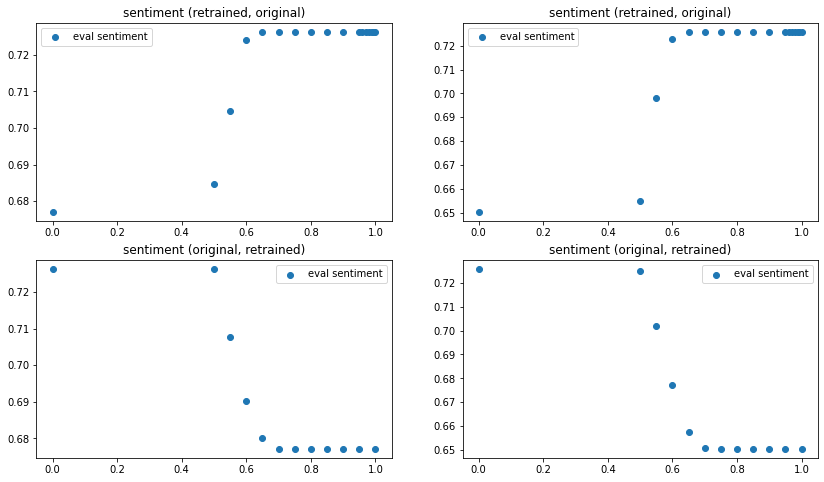

In [9]:
ds = get_ds('sentiment')
ensemble_results(folder_name, model_name, 'sentiment', 'sentiment', ds['val'], ds['test'], 'retrained_model/traced.pt', 'traced.pt')